In [197]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [198]:
df = pd.read_csv("../data/Film_Dataset.csv")

In [199]:
df.head()

,Film_Name,Release_Date,Category,Language,Viewer_Rate,Number_of_Views,Viewing_Month
0,Chennai Express,9/12/2021,Romance,Hindi,4.5,36395,2022-09
1,Mountain Trail,4/27/2020,Comedy,English,3.5,93162,2021-07
2,Eternal Hope,7/4/2020,Romance,English,4.6,98663,2021-04
3,Seoul Heartbeat,4/17/2020,Comedy,English,4.1,112635,2020-07
4,Shadow Pact,2/24/2022,Documentary,English,4.3,29496,2023-05


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Film_Name        460 non-null    object 
 1   Release_Date     460 non-null    object 
 2   Category         460 non-null    object 
 3   Language         460 non-null    object 
 4   Viewer_Rate      460 non-null    float64
 5   Number_of_Views  460 non-null    int64  
 6   Viewing_Month    460 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 25.3+ KB


In [201]:
df.duplicated().any()

np.False_

In [202]:
# Ensure Film_Name column exists
rows_chennai = df[df['Film_Name'] == 'Chennai Express']

# Check the result
print(rows_chennai)
print("Number of rows:", len(rows_chennai))


           Film_Name Release_Date        Category   Language  Viewer_Rate  \
0    Chennai Express    9/12/2021         Romance      Hindi          4.5   
40   Chennai Express    2/21/2023          Comedy    English          4.0   
153  Chennai Express   11/30/2022          Horror      Hindi          3.9   
184  Chennai Express     6/5/2021  Drama/Thriller      Tamil          3.9   
194  Chennai Express    9/26/2020  Drama/Thriller      Tamil          4.4   
214  Chennai Express     2/8/2022   Action/Sci-Fi      Tamil          4.7   
222  Chennai Express    1/25/2022         Romance      Tamil          4.7   
269  Chennai Express    2/27/2021   Action/Sci-Fi  Malayalam          4.4   
289  Chennai Express     2/7/2024         Romance    Sinhala          4.1   
328  Chennai Express    4/13/2021  Drama/Thriller    Sinhala          3.6   
336  Chennai Express   12/28/2020   Action/Sci-Fi    Chinese          4.7   
353  Chennai Express    5/20/2021   Action/Sci-Fi    Chinese          3.7   

In [203]:
# Convert dates
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Viewing_Month'] = pd.to_datetime(df['Viewing_Month'])

# Create features
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Month'] = df['Release_Date'].dt.month
df['Viewing_Year'] = df['Viewing_Month'].dt.year


df['Movie_Age'] = 2025 - df['Release_Year']
df['Month_Number'] = df['Viewing_Month'].dt.month

# df['Age_at_View'] = (df['Viewing_Month'] - df['Release_Date']).dt.days
# df['Age_at_View'] = df['Age_at_View'] / 30   # convert to months

#df['Rating_Age_Interaction'] = df['Viewer_Rate'] * df['Age_at_View']


In [204]:
dec_2025_onwards = df[df['Viewing_Month'] >= '2025-12-01']

num_rows = len(dec_2025_onwards)
print("Number of rows from December 2025 onwards:", num_rows)


Number of rows from December 2025 onwards: 17


In [205]:
df = df[df['Viewing_Month'] < '2025-12-01']

# Optional: reset the index
df = df.reset_index(drop=True)

# Check
print("Number of rows after dropping:", len(df))

Number of rows after dropping: 443


In [206]:
df.head()

,Film_Name,Release_Date,Category,Language,Viewer_Rate,Number_of_Views,Viewing_Month,Release_Year,Release_Month,Viewing_Year,Movie_Age,Month_Number
0,Chennai Express,2021-09-12,Romance,Hindi,4.5,36395,2022-09-01,2021,9,2022,4,9
1,Mountain Trail,2020-04-27,Comedy,English,3.5,93162,2021-07-01,2020,4,2021,5,7
2,Eternal Hope,2020-07-04,Romance,English,4.6,98663,2021-04-01,2020,7,2021,5,4
3,Seoul Heartbeat,2020-04-17,Comedy,English,4.1,112635,2020-07-01,2020,4,2020,5,7
4,Shadow Pact,2022-02-24,Documentary,English,4.3,29496,2023-05-01,2022,2,2023,3,5


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Film_Name        443 non-null    object        
 1   Release_Date     443 non-null    datetime64[ns]
 2   Category         443 non-null    object        
 3   Language         443 non-null    object        
 4   Viewer_Rate      443 non-null    float64       
 5   Number_of_Views  443 non-null    int64         
 6   Viewing_Month    443 non-null    datetime64[ns]
 7   Release_Year     443 non-null    int32         
 8   Release_Month    443 non-null    int32         
 9   Viewing_Year     443 non-null    int32         
 10  Movie_Age        443 non-null    int32         
 11  Month_Number     443 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(5), int64(1), object(3)
memory usage: 33.0+ KB


In [208]:
df['Language_original'] = df['Language']
df['Category_original'] = df['Category']
df_model = pd.get_dummies(df, columns=['Category', 'Language'], drop_first=True)

In [209]:
df_model = df_model.sort_values('Viewing_Month')

In [210]:
# Number of rows
n_total = len(df_model)
n_train = int(n_total * 0.8)  # 80% for training

# Split based on row index (chronological order)
train_data = df_model.iloc[:n_train]
test_data  = df_model.iloc[n_train:]

In [211]:
X_train = train_data.drop(['Number_of_Views', 'Film_Name', 'Viewing_Month', 'Release_Date','Language_original','Category_original'], axis=1)
y_train = train_data['Number_of_Views']


#y_train_log = np.log1p(y_train)  # log(1 + y) to handle zeros


X_test = test_data.drop(['Number_of_Views', 'Film_Name', 'Viewing_Month', 'Release_Date','Language_original','Category_original'], axis=1)
y_test = test_data['Number_of_Views']


In [212]:
# X = df_model.drop(['Number_of_Views', 'Film_Name', 'Viewing_Month', 'Release_Date'], axis=1)
# y = df_model['Number_of_Views']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
df_model.head()

,Film_Name,Release_Date,Viewer_Rate,Number_of_Views,Viewing_Month,Release_Year,Release_Month,Viewing_Year,Movie_Age,Month_Number,...,Language_French,Language_Hindi,Language_Japanese,Language_Korean,Language_Malayalam,Language_Pakistani,Language_Sinhala,Language_Spanish,Language_Taiwanese,Language_Tamil
44,Tech Singularity,2020-01-27,3.5,77131,2020-01-01,2020,1,2020,5,1,...,False,False,False,False,False,False,False,False,False,False
87,Seoul Heartbeat,2020-01-09,4.4,68626,2020-02-01,2020,1,2020,5,2,...,False,False,False,True,False,False,False,False,False,False
184,Digital Dawn,2020-02-04,4.1,32590,2020-04-01,2020,2,2020,5,4,...,False,False,False,False,False,False,False,False,False,True
217,Eternal Hope,2020-01-01,4.0,34420,2020-06-01,2020,1,2020,5,6,...,False,False,False,False,False,False,False,False,False,True
100,Lahore Nights,2020-05-27,4.2,96371,2020-06-01,2020,5,2020,5,6,...,False,True,False,False,False,False,False,False,False,False


In [214]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
#model.fit(X_train, y_train_log)


RandomForestRegressor(n_estimators=300, random_state=42)

In [215]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 12173.332284644193
R2 Score: 0.7806581459342015


In [216]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    model,
    param_grid,
    n_iter=10,
    cv=5,
    scoring='r2'
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

In [217]:
y_pred = best_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 12189.991372470673
R2 Score: 0.7837768176846462


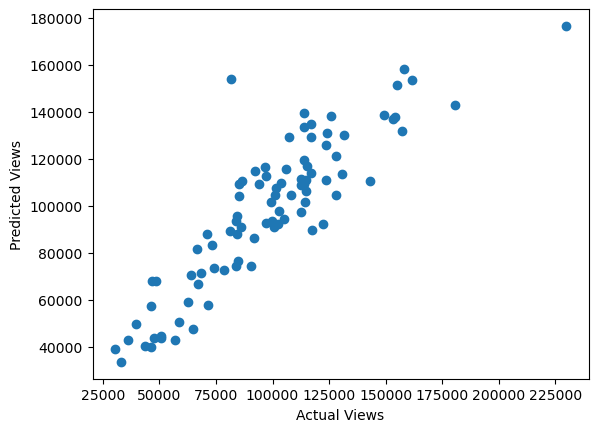

In [218]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.show()


In [219]:
december_data = df_model[df_model['Month_Number'] == 12]
december_data['Predicted_Views'] = best_model.predict(december_data[X.columns])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12204\770290801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_data['Predicted_Views'] = best_model.predict(december_data[X.columns])


In [220]:
top_december = december_data[['Film_Name', 'Language_original','Category_original','Release_Date','Predicted_Views']].sort_values(
    by='Predicted_Views', ascending=False
).head(10)
top_december.shape
print(top_december)

            Film_Name Language_original Category_original Release_Date  \
75   The King's Guard            French           Romance   2020-10-16   
326       Mirror Maze           Chinese           Romance   2021-05-21   
80       Kandy Dreams          Japanese           Romance   2024-10-07   
366      Eternal Hope         Taiwanese           Romance   2022-10-03   
82        Future City          Japanese           Romance   2022-09-28   
278       Mirror Maze           Sinhala           Romance   2023-08-08   
125  Tech Singularity             Hindi     Action/Sci-Fi   2021-01-12   
96   The Last Samurai             Hindi            Comedy   2020-12-24   
35     A Summer Dream           English           Romance   2023-07-02   
106       Future City             Hindi     Action/Sci-Fi   2021-08-05   

     Predicted_Views  
75     164457.660594  
326    162543.495922  
80     158334.050111  
366    156416.721587  
82     155675.684626  
278    153635.074106  
125    153623.034514  
9